In [1]:
select_features=False

In [2]:
run load-clean-select.ipynb

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


Morphology was measured for 1063.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 1063 cells.

The are no duplicated column names: True
Reading the dataset with E-cadherin...
E-cadherin was measured for 576 cells.

The are no duplicated column names: True
Reading the dataset with Vimentin and Cytokeratins...
Vimentin and Cytokeratins were measured for 487 cells.

The are no duplicated column names: True

Full dataset has shape: (1063, 562)
Initial shape is: (1063, 562)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centerZ_nucl',
       'loc_maxintensityZ_dap

In [3]:
df = measurements[measurements.stiffness == "64.0"].copy().reset_index(drop=True)

In [4]:
df['isclumped'] = 0

for image in clumped.image.unique():
    df.loc[df.image == image, 'isclumped'] = 1

df.isclumped.sum()

84

In [5]:
clump_type = CategoricalDtype(categories=[0, 1], ordered=True)
df.isclumped = df.isclumped.astype(clump_type)

# Compare geometric parameters

In [6]:
def px_to_um(x):
    return x * 0.2076

In [8]:
p_corr = df[geom_cols].corrwith(df.isclumped)
fts = p_corr[p_corr.abs()>0.5].abs().sort_values(ascending=False)
fts

neighbors_secondclosestdistance_20    0.688780
neighbors_percenttouching_30          0.675237
neighbors_numberofneighbors_30        0.658429
neighbors_percenttouching_3           0.655605
neighbors_secondclosestdistance_3     0.645374
neighbors_firstclosestdistance_3      0.630543
neighbors_firstclosestdistance_20     0.629749
neighbors_numberofneighbors_20        0.619607
neighbors_numberofneighbors_3         0.580727
area_cyto                             0.565628
neighbors_percenttouching_20          0.555774
maximumradius_cyto                    0.537544
area_cell                             0.536268
meanradius_cyto                       0.516108
medianradius_cyto                     0.512287
perimeter_cell                        0.500630
dtype: float64

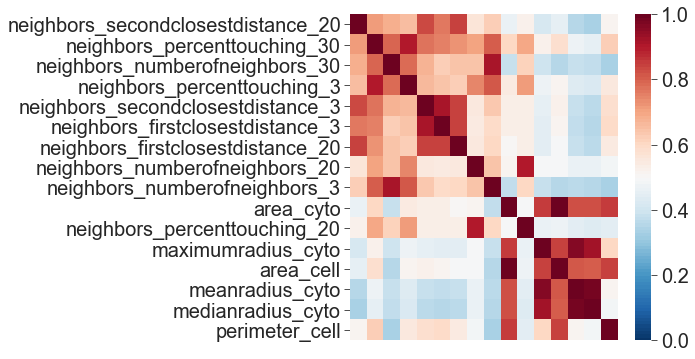

In [9]:
plt.rcParams['figure.figsize'] = (6, 6)

sns.heatmap(df[fts.index].corr().abs(),
            vmin = 0, vmax = 1,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20},
            xticklabels=False, yticklabels=True);


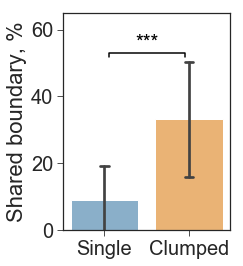

In [11]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'neighbors_percenttouching_3'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 65], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Shared boundary, %");
plt.savefig('../results/Clumped touching.png', bbox_inches='tight', dpi=300);

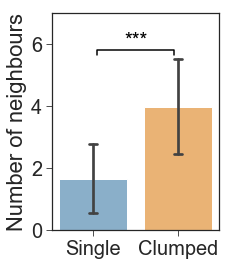

In [12]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'neighbors_numberofneighbors_30'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 7], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Number of neighbours");
plt.savefig('../results/Clumped neighbours.png', bbox_inches='tight', dpi=300);

In [13]:
df.neighbors_firstclosestdistance_3 = px_to_um(df.neighbors_firstclosestdistance_3)

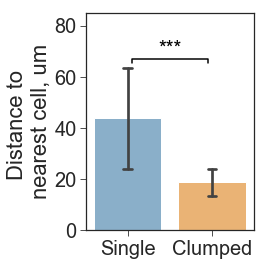

In [14]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'neighbors_firstclosestdistance_3'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 85], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Distance to \nnearest cell, um");
plt.savefig('../results/Clumped 1st distance.png', bbox_inches='tight', dpi=300);

In [16]:
df.neighbors_secondclosestdistance_3 = px_to_um(df.neighbors_secondclosestdistance_3)

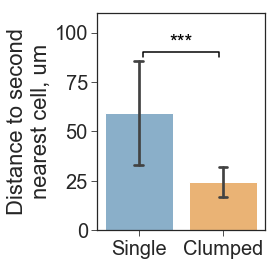

In [17]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'neighbors_secondclosestdistance_3'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 110], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Distance to second\nnearest cell, um");
plt.savefig('../results/Clumped 2nd distance.png', bbox_inches='tight', dpi=300);

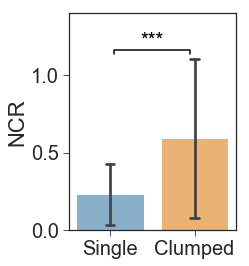

In [18]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'ncr'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 1.4], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("NCR");
plt.savefig('../results/Clumped NCR.png', bbox_inches='tight', dpi=300);

In [19]:
df.area_cell = px_to_um(px_to_um(df.area_cell))

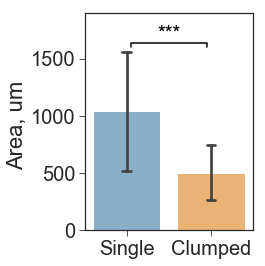

In [20]:
plt.rcParams['figure.figsize'] = (3, 4)
row_colors, palette = func.create_palette(df, by='isclumped')

col = 'area_cell'
ax = sns.barplot(x='isclumped', y=col, data=df,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, [0, 1900], kind='barplot')

ax.set_xticklabels(['Single', 'Clumped']);
plt.xlabel("");
plt.ylabel("Area, um ");
plt.savefig('../results/Clumped area.png', bbox_inches='tight', dpi=300);

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[geom_cols])

df_scaled = pd.concat([df[meta_cols], 
                       pd.DataFrame(X_scaled, columns=geom_cols), 
                       df.isclumped], 
                      axis=1)

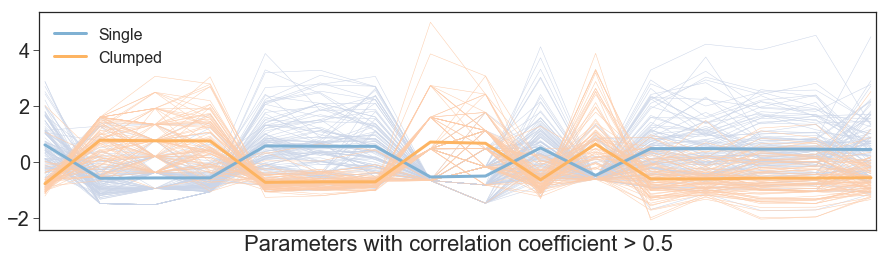

In [28]:
plt.rcParams['figure.figsize'] = (15, 4)

for ind, row in df_scaled.loc[df_scaled.isclumped == 0, fts.index].iterrows():
    plt.plot(fts.index, row, 
             linewidth=0.5, label='_nolegend_',
             color=sns.color_palette("Pastel2", 3)[2]);
    
for ind, row in df_scaled.loc[df_scaled.isclumped == 1, fts.index].iterrows():
    plt.plot(fts.index, row, 
             linewidth=0.5, label='_nolegend_',
             color=sns.color_palette("Pastel2", 3)[1]);
    
plt.plot(fts.index, df_scaled.loc[df_scaled.isclumped == 0, fts.index].mean(), 
         linewidth=3, label="Single",
         color=sns.color_palette("Set3", 6)[4])

plt.plot(fts.index, df_scaled.loc[df_scaled.isclumped == 1, fts.index].mean(), 
         linewidth=3, label="Clumped",
         color=sns.color_palette("Set3", 6)[5])

plt.legend(fontsize=16);
plt.xticks([]);
plt.xlim([-0.1, 15.1]);
plt.xlabel("Parameters with correlation coefficient > 0.5");
plt.savefig('../results/Clumped corr over 0.5.png', bbox_inches='tight', dpi=300);

# Compare expression of biomarkers

In [29]:
s_corr = df[biom_cols].corrwith(df.isclumped)
fts = s_corr.abs().sort_values(ascending=False).head(10)
fts

integratedintensity_ecad       0.757930
meanintensityedge_ker          0.752943
stdintensityedge_ker           0.750141
intensityedgefrac_ecad         0.706313
maxintensityedge_ker           0.704264
madintensity_ecad              0.686488
intensityedgefrac_ker          0.656361
integratedintensityedge_ker    0.637276
meanintensityedge_ecad         0.623533
meanintensityedge_vim          0.622142
dtype: float64

** E-cadherin**

In [30]:
def plot_values(df, col, ylim, ylabel, title, save=None):
    plt.rcParams['figure.figsize'] = (3, 4)
    row_colors, palette = func.create_palette(df, by='isclumped')

    ax = sns.barplot(x='isclumped', y=col, data=df,
                     ci='sd', capsize=.1, palette=palette);

    x_start, x_end, signif = func.ttest(df, 'isclumped', col, equal_var=False, verbose=False)
    func.stat_annot(df, 'isclumped', col, x_start, x_end, signif, ylim, kind='barplot')

    ax.set_xticklabels(['Single', 'Clumped']);
    plt.xlabel("");
    plt.ylabel(ylabel);
    plt.title(title);
    
    if save:
        plt.savefig('../results/Clumped '+ save +'.png', bbox_inches='tight', dpi=300); 

In [ ]:
plot_values(df, 'integratedintensity_ecad', [0, 2600], "Integrated intensity, a.u.", "E-cadherin", save=False)

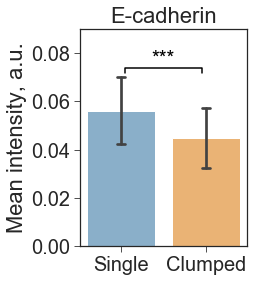

In [31]:
plot_values(df, 'meanintensity_ecad', [0, 0.09], "Mean intensity, a.u.", "E-cadherin", save='Ecad MI')

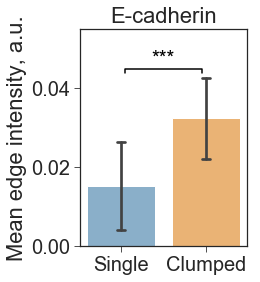

In [32]:
plot_values(df, 'meanintensityedge_ecad', [0, 0.055], "Mean edge intensity, a.u.", "E-cadherin", save='EcadEdge MI')

In [ ]:
plot_values(df, 'intensityedgefrac_ecad', [0, 7], "Fraction on edge, %", "E-cadherin", save=False)

** Vimetin**

In [ ]:
plot_values(df, 'integratedintensity_vim', [0, 3200], "Integrated intensity, a.u.", "Vimentin", save=False)

In [ ]:
plot_values(df, 'meanintensity_vim', [0, 0.27], "Mean intensity, a.u.", "Vimentin", save=False)

In [ ]:
plot_values(df, 'intensityedgefrac_vim', [0, 7], "Fraction on edge, %", "Vimentin", save=False)

** Cytokeratins**

In [ ]:
plot_values(df, 'integratedintensity_ker', [0, 10000], "Integrated intensity, a.u.", "Cytokeratins", save=False)

In [ ]:
plot_values(df, 'meanintensity_ker', [0, 0.65], "Mean intensity, a.u.", "Cytokeratins", save=False)

In [ ]:
plot_values(df, 'intensityedgefrac_ker', [0, 7], "Fraction on edge, %", "Cytokeratins", save=False)

** CVR**

In [ ]:
plot_values(df, 'cvratio', [0, 1], "Ratio", "CVR", save=False)

## Fraction of E-cad on edge: 64 vs the rest

In [33]:
measurements_red.loc[measurements_red.stiffness == "0.2", 'isclumped'] = -4
measurements_red.loc[measurements_red.stiffness == "2.0", 'isclumped'] = -3
measurements_red.loc[measurements_red.stiffness == "16.0", 'isclumped'] = -2
measurements_red.loc[measurements_red.stiffness == "32.0", 'isclumped'] = -1

df_ = pd.concat([measurements_red[measurements_red.stiffness != "64.0"], df.sort_values("isclumped")], axis=0)

In [35]:
clump_type = CategoricalDtype(categories=[-4, -3, -2, -1, 0, 1], ordered=True)
df_.isclumped = df_.isclumped.astype(clump_type)

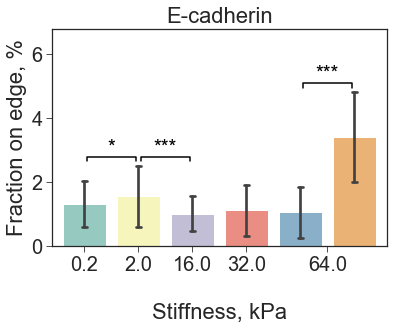

In [43]:
plt.rcParams['figure.figsize'] = (6, 4)

palette = sns.color_palette("Set3", 6)
col = 'intensityedgefrac_ecad'

ax = sns.barplot(x='isclumped', y=col, data=df_,
                 ci='sd', capsize=.1, palette=palette);

x_start, x_end, signif = func.ttest(df_, 'isclumped', col, equal_var=False, verbose=False)
func.stat_annot(df_, 'isclumped', col, x_start, x_end, signif, [0, 6.8], kind='barplot')

plt.xlim([-0.6,5.6])
plt.xlabel("\nStiffness, kPa")
plt.xticks([0, 1, 2, 3, 4.5])
ax.set_xticklabels(["0.2", "2.0", "16.0", "32.0", "64.0"]);
plt.ylabel("Fraction on edge, %");
plt.title("E-cadherin");

plt.savefig('../results/Clumped vs rest EcadEdgeFrac.png', bbox_inches='tight', dpi=300); 